In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Load Data

In [123]:
# Load
data = pd.read_csv('./csv/rgb/2020/jan/result_100_each_class.csv')

In [125]:
data

,Brightness,Greenness,Wetness,Label
0,378.63140,-366.25950,142.373730,0
1,595.81036,-573.41260,233.288240,0
2,310.61980,-270.83585,82.345680,0
3,3474.07370,201.67258,-1641.781400,0
4,3341.68850,206.86620,-1549.777200,0
...,...,...,...,...
495,275.53387,-264.10452,-47.674650,4
496,300.97510,-270.03888,62.787030,4
497,383.51620,-366.35052,50.148808,4
498,212.10716,-190.60397,34.587833,4


# Setup data for Training and Testing

In [126]:
X = data[['Brightness', 'Greenness', 'Wetness']]
y = data['Label']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the Model and Training Model

In [151]:
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

svc = SVC()
actual_model = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
actual_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [157]:
actual_model.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

# Model Evaluation

In [152]:
y_pred = actual_model.predict(X_test)

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.60      0.43      0.50        14
           2       0.40      0.60      0.48        10
           3       0.80      0.50      0.62        24
           4       0.58      0.88      0.70        24

    accuracy                           0.67       100
   macro avg       0.66      0.64      0.63       100
weighted avg       0.71      0.67      0.67       100



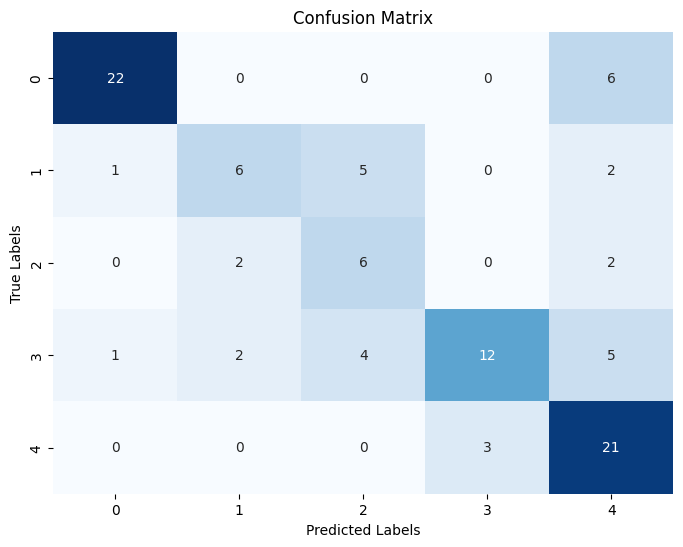

In [155]:
# Confussion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()